In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host= 'localhost',
    port=3306,
    user='root',
    password='root',
    db='shopping'
)

cur = conn.cursor()

In [3]:
''' **Column List**
Customer_ID: 각 개별 고객에게 할당된 고유 식별자로, 시간에 따른 쇼핑 행동 추적과 분석을 용이하게 함
Age: 고객의 나이로, 세분화 및 대상 마케팅 전략에 대한 인구 통계 정보를 제공
Gender: 고객의 성별 식별로, 제품 선호도와 구매 패턴에 영향을 주는 주요 인구 통계 변수
Item_Purchased: 거래 중에 고객이 선택한 특정 제품 또는 항목
Category: 구매한 항목이 속하는 대분류 또는 그룹
Purchase_Amount: 거래의 통화 가치로, 미국 달러(USD)로 표시되며, 구매한 상품의 비용
Location: 구매가 이루어진 지리적 위치로, 지역 선호도와 시장 동향에 대한 통찰력을 제공
Size: 구매한 항목의 사이즈 사양(해당하는 경우)으로, 의류, 신발 및 일부 소비재에 관련이 있음
Color: 구매한 항목과 관련된 색상 변형 또는 선택으로, 고객 선호도와 제품 가용성에 영향을 줌
Season: 구매한 항목의 계절적인 적합성(예: 봄, 여름, 가을, 겨울)으로, 재고 관리와 마케팅 전략에 영향을 줌
Review_Rating: 고객이 구매한 항목에 대한 수치적 또는 정성적 평가로, 구매한 항목에 대한 만족도를 나타냄
Subscription_Status: 고객이 구독 서비스를 선택했는지 여부를 나타내며, 충성도 수준과 반복 수익 가능성에 대한 통찰력을 제공
Shipping_Type: 구매한 항목을 배송하기 위해 사용된 방법을 지정하며(예: 표준 배송, 특급 배송), 배송 시간과 비용에 영향
Discount_Applied: 구매에 프로모션 할인이 적용되었는지 여부를 나타내며, 가격 민감도와 프로모션 효과에 대한 정보를 제공
Promo_Code_Used: 거래 중에 프로모션 코드 또는 쿠폰이 사용되었는지 여부를 기록하여 마케팅 캠페인의 성공을 평가하는 데 도움을 줌
Previous_Purchases: 고객이 이전에 얼마나 자주 구매를 했는지 또는 구매 횟수에 대한 정보로, 고객 세분화와 유지 전략에 기여
Payment_Method: 고객이 사용한 결제 방식을 지정하며(예: 신용카드, 현금), 선호하는 결제 옵션에 대한 통찰력을 제공
Frequency_of_Purchases: 고객이 구매 활동을 얼마나 자주하는지를 나타내며, 고객 충성도와 평생 가치를 평가하는 데 중요한 지표

'''

sql = "select * from shopping_trends"
cur.execute(sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
# 3. 좋은 리뷰일수록 구독을 많이 하는 지 여부 파악

In [5]:
pri_table = '''
    with pri_table as (
        select
            Category as C,
            Color,
            Review_Rating as RR,
            Subscription_Status as SS,
            Shipping_Type as shipping,
            Payment_Method as PM,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        order by
            Category
    )
'''

In [6]:
sql = '''
    select
        *
    from
        pri_table
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4,5,6
0,Accessories,Blue,3.1,No,Store Pickup,Credit Card,Monthly
1,Accessories,Magenta,4.5,No,2-Day Shipping,Cash,Bi-Weekly
2,Accessories,Gray,4.5,No,Standard,PayPal,Every 3 Months
3,Accessories,Indigo,3.0,No,2-Day Shipping,Debit Card,Weekly
4,Accessories,Black,3.9,No,Express,Credit Card,Quarterly
...,...,...,...,...,...,...,...
3895,Outerwear,Lavender,4.2,No,Next Day Air,Cash,Monthly
3896,Outerwear,Gray,3.7,No,Store Pickup,Debit Card,Weekly
3897,Outerwear,Gray,4.3,No,Free Shipping,Credit Card,Fortnightly
3898,Outerwear,Maroon,3.3,No,2-Day Shipping,Venmo,Every 3 Months


In [7]:
# 0. 구독 비율
sql = '''
    select
        SS,
        count(SS) as count_SS
    from
        pri_table
    group by
        SS
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df

## -> 구독 안한 사람들이 더 많다.

,0,1
0,No,2847
1,Yes,1053


In [8]:
# 3. 좋은 리뷰일수록 구독을 많이 하는 지 여부 파악

In [9]:
# 구독을 한 사람들만 들어있는 테이블
table_yes = '''
    with TableYes as (
        select
            Category as C,
            Color,
            Review_Rating as RR,
            Subscription_Status as SS,
            Shipping_Type as shipping,
            Payment_Method as PM,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        where
            Subscription_Status = 'Yes'
        order by
            Category
    )
'''

# 구독을 안한 사람들만 들어있는 테이블
table_no = '''
    with TableNo as (
        select
            Category as C,
            Color,
            Review_Rating as RR,
            Subscription_Status as SS,
            Shipping_Type as shipping,
            Payment_Method as PM,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        where
            Subscription_Status = 'No'
        order by
            Category
    )
'''

In [13]:
# 구독을 한 사람들 기준으로 카테고리 별 별점 평균
sql = '''
    select
        C,
        AVG(RR) as average_RR
    from
        TableYes
    group by
        C
'''
cur.execute(table_yes+sql)

result = cur.fetchall()

df_yes = pd.DataFrame(result)
df_yes

# 구독을 안한 사람들 기준으로 카테고리 별 별점 평균
sql = '''
    select
        C,
        AVG(RR) as average_RR
    from
        TableNo
    group by
        C
'''
cur.execute(table_no+sql)

result = cur.fetchall()

df_no = pd.DataFrame(result)
df_no

df_total = df_yes.copy()

df_total[2] = df_no[1]
df_total

,0,1,2
0,Clothing,3.717068,3.725312
1,Footwear,3.757895,3.769528
2,Outerwear,3.689011,3.763024
3,Accessories,3.783832,3.803738


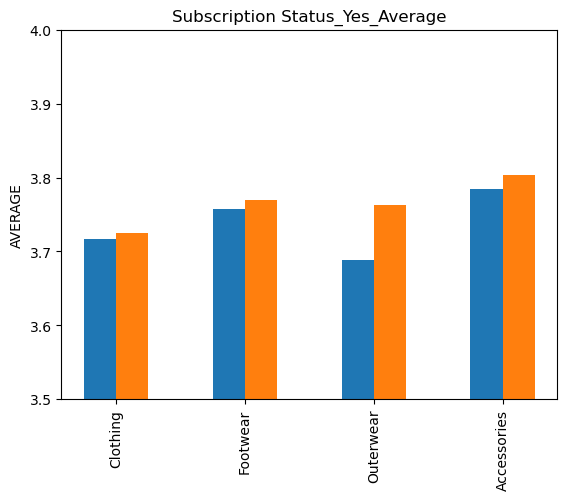

In [14]:
# 구독을 한 사람들 기준으로 카테고리 별 별점 평균 시각화
plt.bar(df_total.index - 0.125, df_total[1], width = 0.25)
plt.bar(df_total.index + 0.125, df_total[2], width = 0.25)

plt.title('Subscription Status_Yes_Average')
plt.xticks(df_total.index, df_total[0], rotation = 90)
plt.ylabel('AVERAGE')

plt.ylim([3.5, 4])

plt.show()

# 모든 카테고리가 구독을 안한 고객의 별점이 조금 더 높았다. --> 사실 별점 차이가 크진 않다.
# 그 중 Outerwear의 별점 차이가 좀 있다.
# 문제는 구독을 안해야 별점이 높다...?? -
# 정리하자면, 별점에 따라 카테고리는 차이가 없다.

In [15]:
# 리뷰에 따른 구독

# 리뷰 5인 것들
r1_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR = 5
    group by
        SS
'''

# 리뷰 4.5 이상, 5 미만인 것들
r2_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR >= 4.5 and RR < 5
    group by
        SS
'''

# 리뷰 4 이상, 4.5 미만인 것들
r3_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR >= 4 and RR < 4.5
    group by
        SS
'''

# 리뷰 3.5 이상, 4 미만인 것들
r4_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR >= 3.5 and RR < 4
    group by
        SS
'''

# 리뷰 3 이상, 3.5 미만인 것들
r5_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR >= 3 and RR < 3.5
    group by
        SS
'''

# 리뷰 2.5 이상, 3 미만인 것들
r6_sql = '''
    select
        SS,
        count(RR)
    from
        pri_table
    where
        RR >= 2.5 and RR < 3
    group by
        SS
'''
cur.execute(pri_table+r1_sql)

result = cur.fetchall()

df_r1 = pd.DataFrame(result)
print(df_r1)
print()


cur.execute(pri_table+r2_sql)

result = cur.fetchall()

df_r2 = pd.DataFrame(result)
print(df_r2)
print()


cur.execute(pri_table+r3_sql)

result = cur.fetchall()

df_r3 = pd.DataFrame(result)
print(df_r3)
print()


cur.execute(pri_table+r4_sql)

result = cur.fetchall()

df_r4 = pd.DataFrame(result)
print(df_r4)
print()


cur.execute(pri_table+r5_sql)

result = cur.fetchall()

df_r5 = pd.DataFrame(result)
print(df_r5)
print()


cur.execute(pri_table+r6_sql)

result = cur.fetchall()

df_r6 = pd.DataFrame(result)
print(df_r6)


     0   1
0  Yes  12
1   No  56

     0    1
0  Yes  216
1   No  555

     0    1
0  Yes  209
1   No  596

     0    1
0  Yes  211
1   No  555

     0    1
0  Yes  220
1   No  585

     0    1
0  Yes  185
1   No  500


Text(0, 0.5, 'Count')

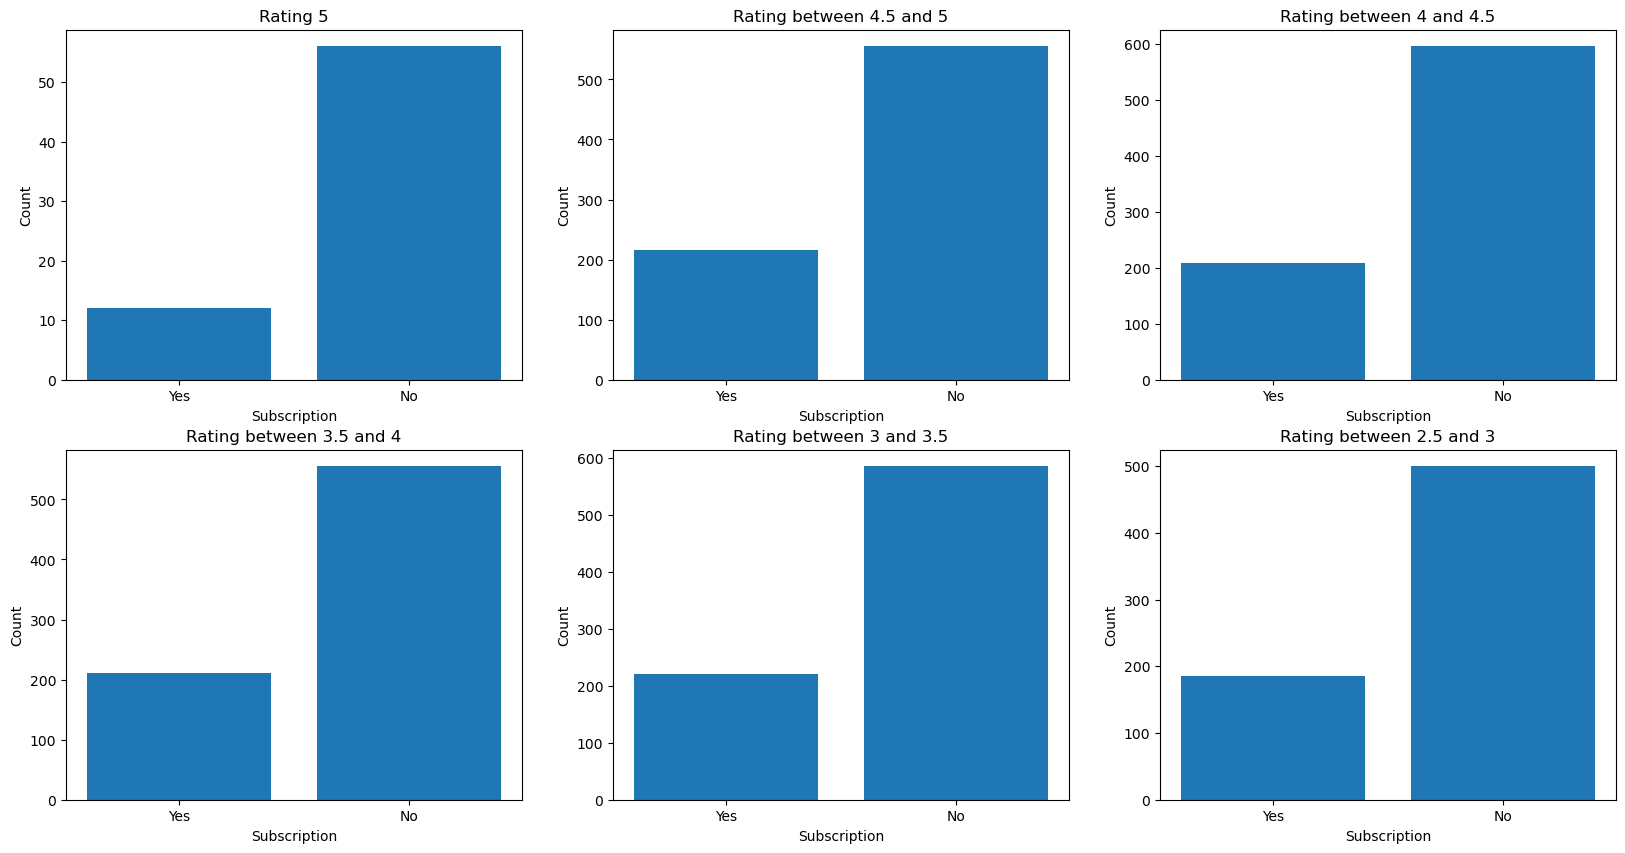

In [16]:
rating = ['5', '>= 4.5', '>= 4', '>= 3.5', '>= 3', '>= 2.5']
subscription = ['Yes', 'No']

fig, axes = plt.subplots(2, 3, figsize = (20, 10))

axes[0, 0].bar(subscription, df_r1[1])
axes[0, 0].set_title('Rating 5')
axes[0, 0].set_xlabel('Subscription')
axes[0, 0].set_ylabel('Count')
axes[0, 1].bar(subscription, df_r2[1])
axes[0, 1].set_title('Rating between 4.5 and 5')
axes[0, 1].set_xlabel('Subscription')
axes[0, 1].set_ylabel('Count')
axes[0, 2].bar(subscription, df_r3[1])
axes[0, 2].set_title('Rating between 4 and 4.5')
axes[0, 2].set_xlabel('Subscription')
axes[0, 2].set_ylabel('Count')
axes[1, 0].bar(subscription, df_r4[1])
axes[1, 0].set_title('Rating between 3.5 and 4')
axes[1, 0].set_xlabel('Subscription')
axes[1, 0].set_ylabel('Count')
axes[1, 1].bar(subscription, df_r5[1])
axes[1, 1].set_title('Rating between 3 and 3.5')
axes[1, 1].set_xlabel('Subscription')
axes[1, 1].set_ylabel('Count')
axes[1, 2].bar(subscription, df_r6[1])
axes[1, 2].set_title('Rating between 2.5 and 3')
axes[1, 2].set_xlabel('Subscription')
axes[1, 2].set_ylabel('Count')

In [29]:
# 리뷰 3 이상, 3.5 미만인 것들
pri_table = '''
    with pri_table as (
        select
            Item_Purchased as IP,
            Category as C,
            Color,
            Review_Rating as RR,
            Subscription_Status as SS,
            Shipping_Type as shipping,
            Payment_Method as PM,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        where
            Subscription_Status = 'No'
        order by
            Category
    )
'''

sql = '''
    select
        C,
        avg(RR) as average_RR,
    from
        pri_table
    where
        RR >= 3 and RR < 3.5
    group by
        C
'''

cur.execute(pri_table+sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df

,0,1,2
0,Clothing,3.201786,280
1,Outerwear,3.196774,31
2,Accessories,3.212245,196
3,Footwear,3.201282,78


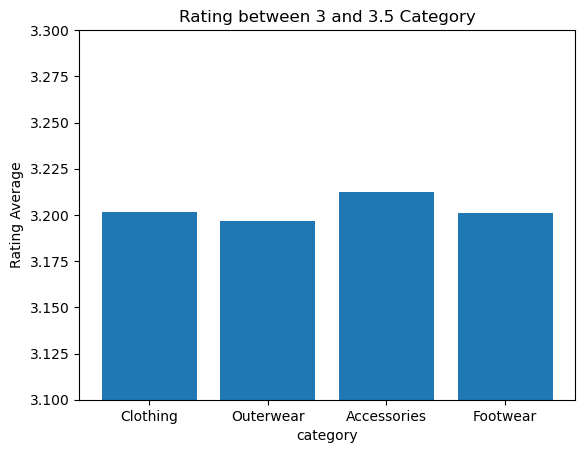

In [34]:
plt.bar(df[0], df[1])
plt.title('Rating between 3 and 3.5 Category')
plt.xlabel('category')
plt.ylabel('Rating Average')
plt.ylim([3.1, 3.3])

plt.show()

In [37]:
sql = '''
    select
        IP,
        AVG(RR) as average_RR,
        count(RR) as count_RR
    from
        pri_table
    where
        C = 'Outerwear'
        and (RR >= 3 and RR < 3.5)
    group by
        IP
'''

cur.execute(pri_table+sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df

,0,1,2
0,Jacket,3.204762,21
1,Coat,3.180000,10


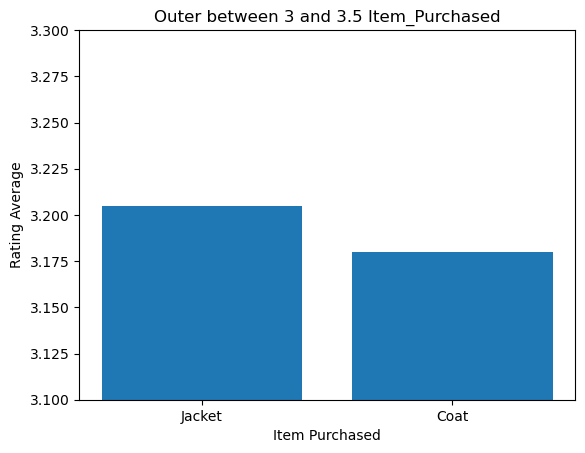

In [38]:
plt.bar(df[0], df[1])
plt.title('Outer between 3 and 3.5 Item_Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Rating Average')
plt.ylim([3.1, 3.3])

plt.show()